# Reading the Genome

In [63]:
import gzip

def loadFasta(filename):
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'rb')
        data = fp.read().decode("utf-8").split('>')
    else:
        fp = open(filename, 'r')
        data = fp.read().split('>')
    fp.close()
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

In [5]:
header, sequence = loadFasta("covid19.gz")

In [6]:
print(header)

['NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome']


In [7]:
print(sequence)

['+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGT

# Analyzing the Genome

In [8]:
gene = {
    "5' UTR": (1, 265),
    "ORF1a": (266, 13484),
    "ORF1ab": (267, 21555),
    "S": (21563, 25385),
    "ORF3a": (25393, 26221),
    "E": (26245, 26473),
    "M": (26523, 27192),
    "ORF6": (27202, 27388),
    "ORF7a" : (27394, 27760),
    "ORF7b": (27756, 27888),
    "ORF8": (27894, 28260),
    "N": (28274, 29534),
    "ORF10": (29558, 29675),
    "3' UTR": (29675, 29903)
}

In [9]:
seq = sequence[0][1:]

In [10]:
total = len(seq)
print("The entire Covid-19 genome is {} base pairs long!".format(total))

The entire Covid-19 genome is 29903 base pairs long!


In [34]:
def countBasePairs(seq):
    count = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for allele in seq:
        count[allele] += 1
    return count

In [35]:
countBasePairs(seq)

{'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594}

In [58]:
import pandas as pd

names = []
count_maps = []
sizes = []

for g in gene:
    names.append(g)
    count_maps.append(countBasePairs(seq[gene[g][0]:gene[g][1]]))
    sizes.append(gene[g][1] - gene[g][0])
    
df = pd.DataFrame()
df['Gene Name'] = names
df['Allele Frequencies'] = count_maps
df['Size'] = sizes
df

,Gene Name,Allele Frequencies,Size
0,5' UTR,"{'A': 66, 'C': 63, 'G': 55, 'T': 80}",264
1,ORF1a,"{'A': 3949, 'C': 2331, 'G': 2657, 'T': 4281}",13218
2,ORF1ab,"{'A': 6424, 'C': 3744, 'G': 4230, 'T': 6890}",21288
3,S,"{'A': 1125, 'C': 723, 'G': 703, 'T': 1271}",3822
4,ORF3a,"{'A': 224, 'C': 174, 'G': 154, 'T': 276}",828
5,E,"{'A': 49, 'C': 45, 'G': 42, 'T': 92}",228
6,M,"{'A': 170, 'C': 146, 'G': 140, 'T': 213}",669
7,ORF6,"{'A': 68, 'C': 26, 'G': 26, 'T': 66}",186
8,ORF7a,"{'A': 107, 'C': 79, 'G': 61, 'T': 119}",366
9,ORF7b,"{'A': 31, 'C': 24, 'G': 17, 'T': 60}",132


In [59]:
import matplotlib.pyplot as plt

def generate_plots(df):
    for row in df.iterrows():
        data = row[1][1]
        print(row[1][0])
        plt.bar(*zip(*data.items()))
        plt.show()

5' UTR


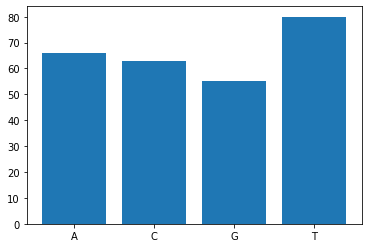

ORF1a


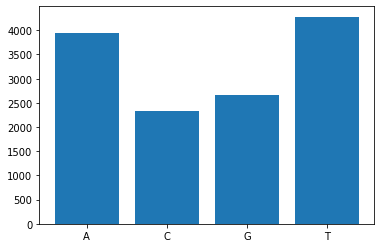

ORF1ab


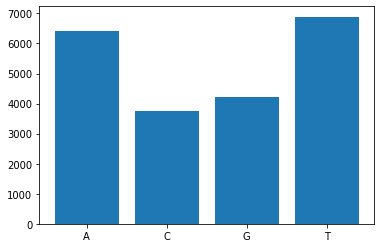

S


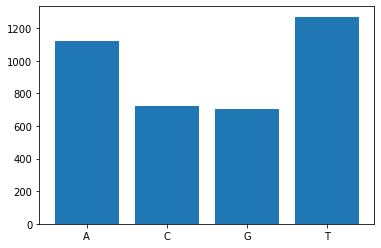

ORF3a


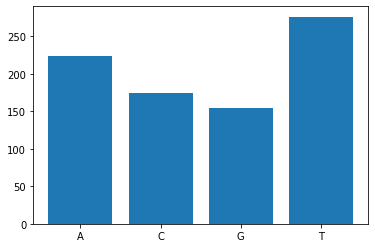

E


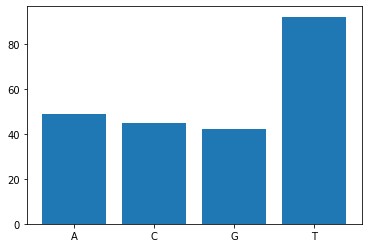

M


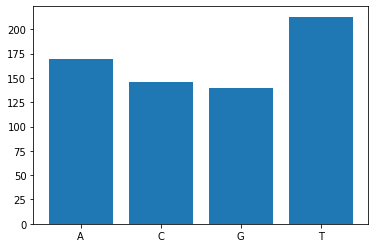

ORF6


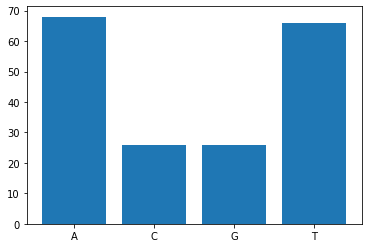

ORF7a


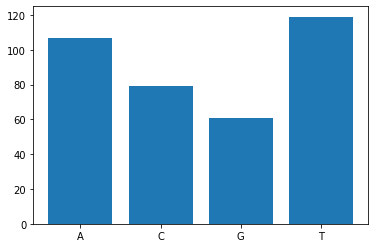

ORF7b


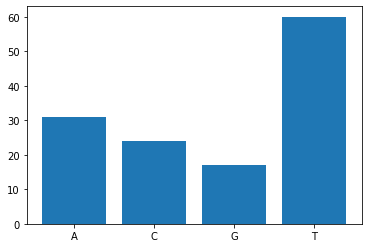

ORF8


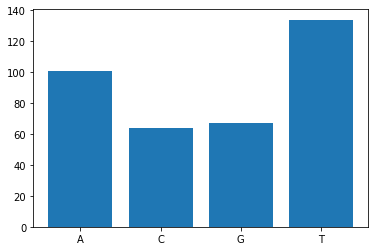

N


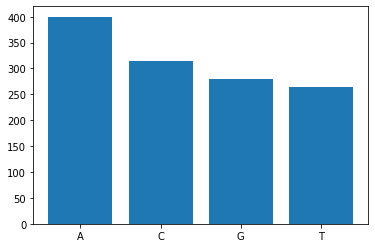

ORF10


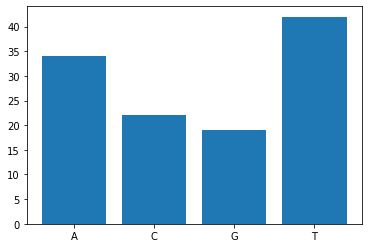

3' UTR


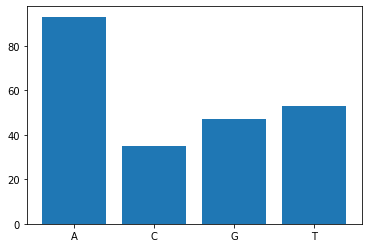

In [57]:
generate_plots(df) 

# Simulating Translation

In [53]:
codon = {
    "AAA": 'K', "AAG": 'K', "AAC": 'N', "AAT": 'N',
    "AGA": 'R', "AGG": 'R', "AGC": 'S', "AGT": 'S',
    "ACA": 'T', "ACG": 'T', "ACC": 'T', "ACT": 'T',
    "ATA": 'I', "ATG": 'M', "ATC": 'I', "ATT": 'I',
    "GAA": 'E', "GAG": 'E', "GAC": 'D', "GAT": 'D',
    "GGA": 'G', "GGG": 'G', "GGC": 'G', "GGT": 'G',
    "GCA": 'A', "GCG": 'A', "GCC": 'A', "GCT": 'A',
    "GTA": 'V', "GTG": 'V', "GTC": 'V', "GTT": 'V',
    "CAA": 'Q', "CAG": 'Q', "CAC": 'H', "CAT": 'H',
    "CGA": 'R', "CGG": 'R', "CGC": 'R', "CGT": 'R',
    "CCA": 'P', "CCG": 'P', "CCC": 'P', "CCT": 'P',
    "CTA": 'L', "CTG": 'L', "CTC": 'L', "CTT": 'L',
    "TAA": '*', "TAG": '*', "TAC": 'Y', "TAT": 'Y',
    "TGA": '*', "TGG": 'W', "TGC": 'C', "TGT": 'C',
    "TCA": 'S', "TCG": 'S', "TCC": 'S', "TCT": 'S',
    "TTA": 'L', "TTG": 'L', "TTC": 'F', "TTT": 'F'
}

AminoAcid = {
    'A': 'Alanine', 'C': 'Cysteine', 'D': 'Aspartic acid', 'E': 'Glutamic acid', 'F': 'Phenylalanine',
    'G': 'Glycine', 'H': 'Histidine', 'I': 'Isoleucine', 'K': 'Lysine', 'L': 'Leucine', 'M': 'Methionine',
    'N': 'Asparagine', 'P': 'Proline', 'Q': 'Glutamine', 'R': 'Arginine', 'S': 'Serine',
    'T': 'Theronine', 'V': 'Valine', 'W': 'Tryptophan', 'Y': 'Tyrosine', '*': 'STOP'
}

In [54]:
def translate(seq):
    return ''.join([codon[seq[i:i+3]] for i in range(0,len(seq),3)])

In [55]:
translate(seq[gene['S'][0]:gene['S'][1]])

'CLFFLFYCH*SLVSVLILQPELNYPLHTLILSHVVFITLTKFSDPQFYIQLRTCSYLSFPMLLGSMLYMSLGPMVLRGLITLSYHLMMVFILLPLRSLT**EAGFLVLL*IRRPSPYLLLITLLMLLLKSVNFNFVMIHFWVFITTKTTKVGWKVSSEFILVRIIALLNMSLSLFLWTLKENRVISKILGNLCLRILMVILKYILSTRLLI*CVISLRVFRL*NHW*ICQ*VLTSLGFKLYLLYIEVI*LLVILLQVGQLVLQLIMWVIFNLGLFY*NIMKMEPLQML*TVHLTLSQKQSVR*NPSL*KKESIKLLTLESNQQNLLLDFLILQTCALLVKFLTPPDLHLFMLGTGRESATVLLIILSYIIPHHFPLLSVMECLLLN*MISALLMSMQIHL*LEVMKSDKSLQGKLERLLIIIINYQMILQAAL*LGILTILILRLVVIIITCIDCLGSLISNLLREIFQLKSIRPVAHLVMVLKVLIVTFLYNHMVSNPLMVLVTNHTE**YFLLNFYMHQQLFVDLKSLLIWLKTNVSISTSMV*QAQVFLLSLTKSFCLSNNLAETLLTLLMLSVIHRHLRFLTLHHVLLVVSVL*HQEQILLTRLLFFIRMLTAQKSLLLFMQINLLLLGVFILQVLMFFKHVQAV**GLNMSTTHMSVTYPLVQVYALVIRLRLILLGGHVV*LVNPSLPTLCHLVQKIQLLTLITLLPYPQILLLVLPQKFYQCL*PRHQ*IVQCTFVVIQLNAAIFCCNMAVFVHN*TVL*LE*LLNKTKTPKKFLHKSNKFTKHHQLKILVVLIFHKYYQIHQNQARGHLLKIYFSTK*HLQMLASSNNMVIALVILLLETSFVHKSLTALLFCHLCSQMK*LLNTLLHC*RVQSLLVGPLVQVLHYKYHLLCKWLIGLMVLELHRMFSMRTKN*LPTNLIVLLAKFKTHFLPQQVHLENFKMWSTKMHKL*TRLLNNLAPILVQFQVF*MISFHVLTKLRLKCKLIG*SQA

In [64]:
def countAminoAcids(seq):
    count = {acid: 0 for acid in sorted([codon[triplet] for triplet in codon])}
    for acid in seq:
        count[acid] += 1
    return count

In [65]:
names = []
amino_acid_frequencies = []
sizes = []

for g in gene:
    names.append(g)
    protein = translate(seq[gene[g][0]:gene[g][1]])
    sizes.append(len(protein))
    amino_acid_frequencies.append(countAminoAcids(protein))

df = pd.DataFrame()
df['Name'] = names
df['Amino Acid Frequencies'] = amino_acid_frequencies
df['Size'] = sizes
df

,Name,Amino Acid Frequencies,Size
0,5' UTR,"{'*': 3, 'A': 3, 'C': 4, 'D': 2, 'E': 0, 'F': ...",88
1,ORF1a,"{'*': 251, 'A': 91, 'C': 126, 'D': 40, 'E': 66...",4406
2,ORF1ab,"{'*': 543, 'A': 281, 'C': 456, 'D': 233, 'E': ...",7096
3,S,"{'*': 55, 'A': 33, 'C': 29, 'D': 9, 'E': 28, '...",1274
4,ORF3a,"{'*': 16, 'A': 10, 'C': 10, 'D': 2, 'E': 5, 'F...",276
5,E,"{'*': 7, 'A': 3, 'C': 3, 'D': 1, 'E': 1, 'F': ...",76
6,M,"{'*': 17, 'A': 7, 'C': 9, 'D': 5, 'E': 5, 'F':...",223
7,ORF6,"{'*': 7, 'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': ...",62
8,ORF7a,"{'*': 9, 'A': 6, 'C': 2, 'D': 3, 'E': 3, 'F': ...",122
9,ORF7b,"{'*': 4, 'A': 1, 'C': 4, 'D': 0, 'E': 0, 'F': ...",44


5' UTR


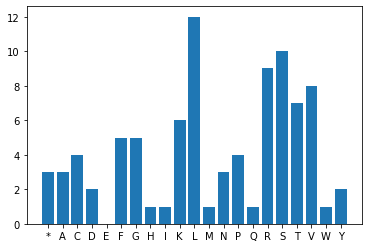

ORF1a


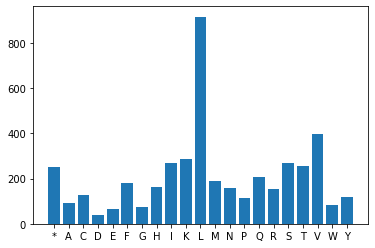

ORF1ab


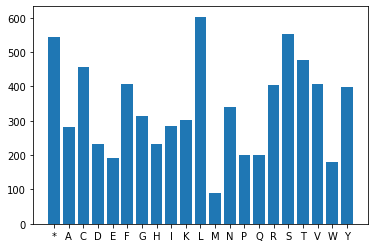

S


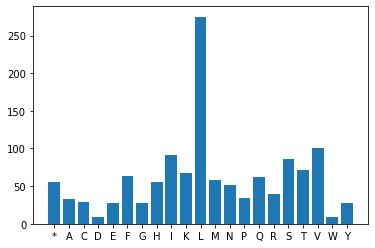

ORF3a


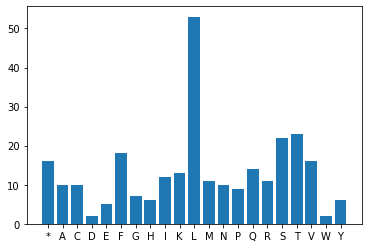

E


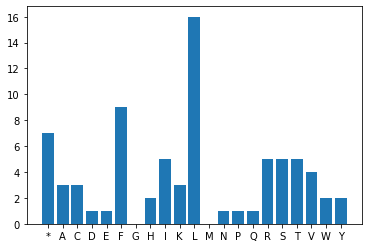

M


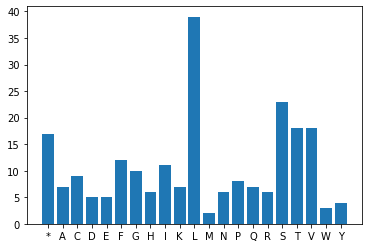

ORF6


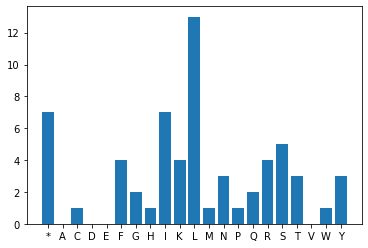

ORF7a


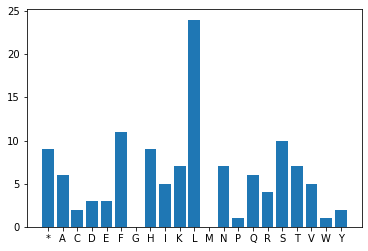

ORF7b


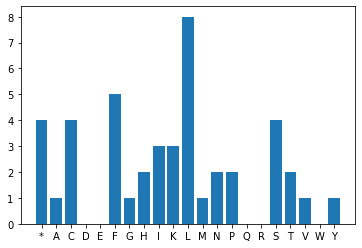

ORF8


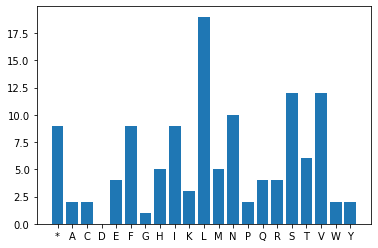

N


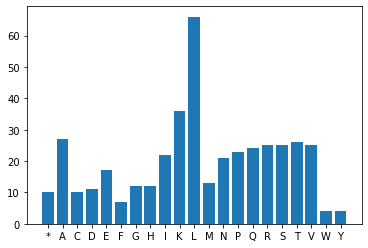

ORF10


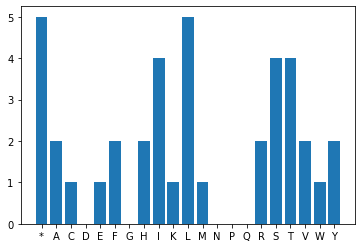

3' UTR


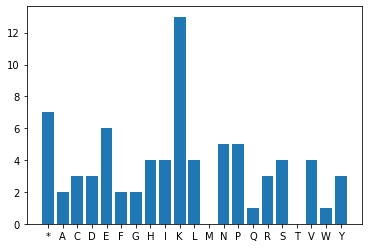

In [66]:
generate_plots(df)